In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

In [2]:
Dataset = pd.read_csv (r'C:\\Users\\56395\\Desktop\\Dataset.csv', encoding= 'unicode_escape')
X = Dataset.iloc[:, :-1].values
#print(X)

In [3]:
Y = Dataset.iloc[:,14].values
y = Y[:, None] 
#print(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [5]:
ss_X = StandardScaler()

X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

ss_y = StandardScaler()
y_train = ss_y.fit_transform(y_train)
y_test = ss_y.transform(y_test)

ss_Y = StandardScaler()
y_total = ss_Y.fit_transform(y)
x_total = ss_X.fit_transform(X)

In [6]:
from xgboost import XGBRegressor
fit1 = XGBRegressor(booster='gbtree',
                    eval_metric='rmse',
                    gamma = 0.001,
                    min_child_weight= 3,
                    max_depth= 4,
                    subsample= 0.9,
                    max_leaves=200,
                    colsample_bytree=1,
                    tree_method= 'exact',
                    learning_rate=0.13,
                    n_estimators=2000,
                    nthread=2,
                    scale_pos_weight=1,
                    seed=300)
fit1.fit(X_train,
          y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, gamma=0.001,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.13, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=200,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None, nthread=2,
             num_parallel_tree=None, ...)

In [7]:
pred1_train = fit1.predict(X_train)
from sklearn.metrics import mean_squared_error
mse_1 = mean_squared_error(pred1_train,y_train)
rmse_1 = np.sqrt(mse_1)
print ("Train ERROR = ", rmse_1)
from sklearn.metrics import r2_score
R_1 = r2_score(pred1_train,y_train)
print ("R1 = ", R_1)
from sklearn.metrics import mean_absolute_error
mae_1 = mean_absolute_error(pred1_train,y_train)
print ("MAE_1 = ", mae_1)

Train ERROR =  0.016624150548786708
R1 =  0.9997225477039993
MAE_1 =  0.011826814217037115


In [8]:
pred1_test = fit1.predict(X_test)
mse_2 = mean_squared_error(pred1_test,y_test)
rmse_2 = np.sqrt(mse_2)
print ("Test ERROR = ", rmse_2)
pred1_test = fit1.predict(X_test)
R_2 = r2_score(pred1_test,y_test)
print ("R2 = ", R_2)
mae_2 = mean_absolute_error(pred1_test,y_test)
print ("MAE_2 = ", mae_2)

Test ERROR =  0.37216731722782115
R2 =  0.8176652745333887
MAE_2 =  0.23531941956008848


In [9]:
pred1_total = fit1.predict(x_total)
mse_3 = mean_squared_error(pred1_total,y_total)
rmse_3 = np.sqrt(mse_3)
print ("Test ERROR = ", rmse_3)
pred1_test = fit1.predict(X_test)
R_3 = r2_score(pred1_total,y_total)
print ("R3 = ", R_3)
mae_3 = mean_absolute_error(pred1_total,y_total)
print ("MAE_3 = ", mae_3)

Test ERROR =  0.3647613439282332
R3 =  0.8267605880468255
MAE_3 =  0.21809850144781567


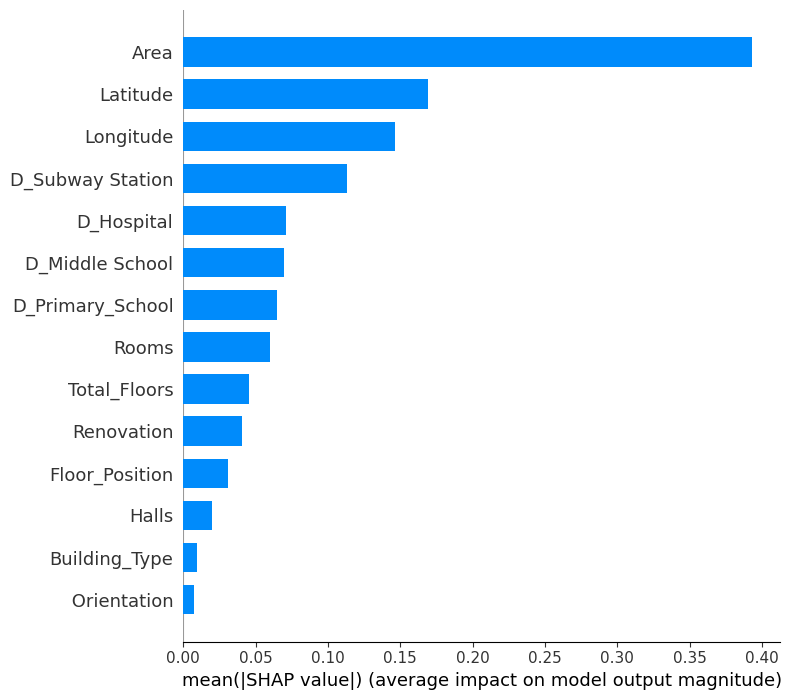

In [10]:
import shap
import matplotlib.pyplot as plt
# model是在第1节中训练的模型
explainer = shap.TreeExplainer(fit1)
#feature=['经度','纬度','距离中学MIN(米)','室','厅','面积','朝向','装修','所处楼层位置','总楼层数','建筑形式','距离医院（米）','距离地铁站MIN（米）','距离小学MIN(米)','售价']
feature=['Longitude','Latitude','D_Middle School','Rooms','Halls','Area',' Orientation','Renovation','Floor_Position','Total_Floors','Building_Type','D_Hospital','D_Subway Station','D_Primary_School']
shap_values = explainer.shap_values(x_total)
shap.summary_plot(shap_values, x_total, plot_type="bar",show=False,feature_names=feature)
#plt.savefig('fig1.png')

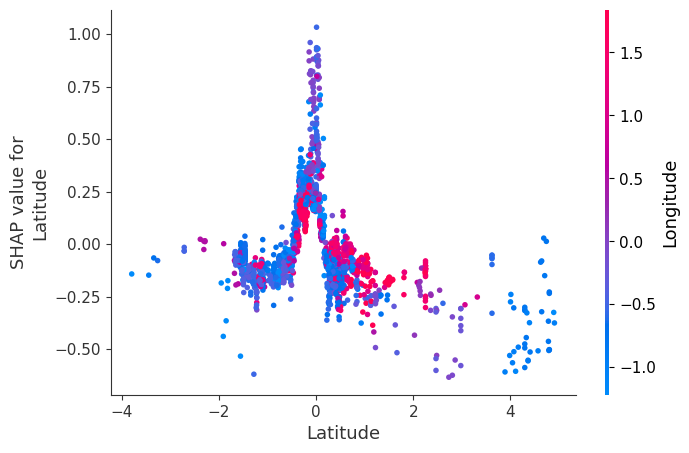

In [11]:
shap.dependence_plot(1, shap_values, x_total, interaction_index=0, show=False, feature_names=feature)
#plt.savefig('fig2.png')

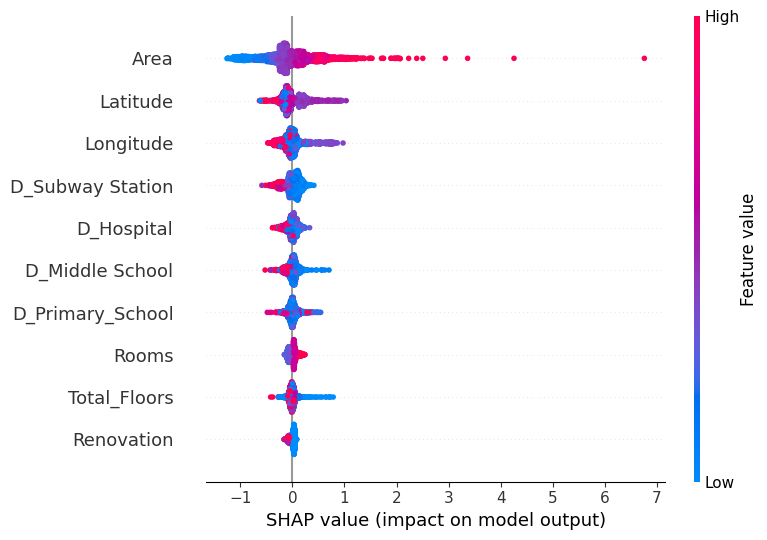

In [12]:
shap.summary_plot(shap_values, x_total,show=False,feature_names=feature,max_display=10)
#plt.savefig('fig3.png')